In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
print(f'seaborn version: {sns.__version__}')

seaborn version: 0.10.1


In [3]:
# wine dataset
from sklearn.datasets import load_wine
data = load_wine()
print(type(data))


<class 'sklearn.utils.Bunch'>


In [5]:
wdf = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv')
print(wdf.head())
print(wdf.dtypes)
print(wdf.shape)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [13]:
wdf['overall'] = wdf['quality'].apply(lambda x : 
                                      'Poor' if x < 5 else 'Medium' if x < 8 else 'Good' )
wdf.overall = wdf.overall.astype('category')

wdf.overall.value_counts()

Medium    6053
Poor       246
Good       198
Name: overall, dtype: int64

<AxesSubplot:xlabel='sulphates', ylabel='chlorides'>

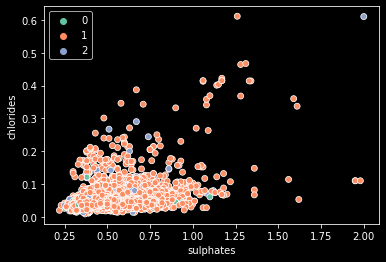

In [14]:
sns.scatterplot(x=wdf.sulphates, y=wdf.chlorides,hue=wdf.overall.cat.codes, palette="Set2")
#not very good for clustering

In [20]:
from sklearn.datasets import make_blobs
import numpy as np

X, y = make_blobs(n_samples=500, centers=3, n_features=2,random_state=0)
print(X.shape)
print(y.shape, np.unique(y, return_counts=True))


(500, 2)
(500,) (array([0, 1, 2]), array([167, 167, 166]))


<AxesSubplot:>

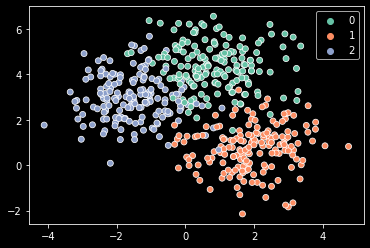

In [21]:
sns.scatterplot(x=X[:,0], y=X[:,1],hue=y, palette="Set2")

<AxesSubplot:>

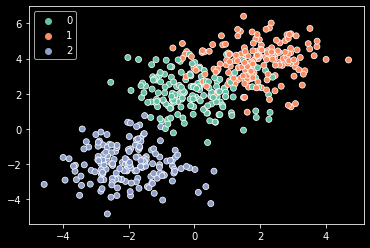

In [26]:
X, y = make_blobs(n_samples=500, centers=[(0,2), (2,4), (-2,-2)], n_features=3,random_state=0)
sns.scatterplot(x=X[:,0], y=X[:,1],hue=y, palette="Set2")



<AxesSubplot:>

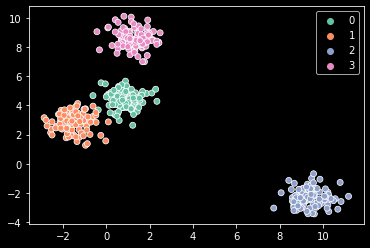

In [42]:
X, y = make_blobs(n_samples=400,
                       centers=4,
                       n_features=4,
                       cluster_std=0.60,
                       random_state=0)
sns.scatterplot(x=X[:,0], y=X[:,1],hue=y, palette="Set2")


In [43]:
print(X.shape, y.shape)
d = np.stack((X,y[:,np.newaxis]))
print(d.shape)

(400, 4) (400,)


ValueError: all input arrays must have the same shape

In [39]:
d = {'x1' : X[:,0],'x2': X[:,1],'label':y}
df = pd.DataFrame(data=d)
print(df.head())
df.to_csv("test.csv")

         x1        x2  label
0  0.250064  6.488267      3
1 -2.697986  2.521947      2
2 -2.900076  3.068773      2
3  0.702951  4.314275      0
4 -2.535635  2.384499      2


In [40]:
!head test.csv

,x1,x2,label
0,0.250064460206054,6.488267026618753,3
1,-2.6979864741108663,2.521947223495424,2
2,-2.9000760372306225,3.068772910346045,2
3,0.7029505764360892,4.314274822863424,0
4,-2.5356349425185654,2.3844994464758527,2
5,-1.7029782910012499,7.805409559070701,3
6,2.223222280858821,0.8387734261521621,1
7,0.00793137001172417,4.1761431593200085,0
8,-1.7904177263031942,3.0266853188638154,2


In [47]:
i = 7


clustering_data_07.csv


In [48]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd

for i in range(10):
    std = .5+i*.04
    X, y = make_blobs(n_samples=400,
                       centers=4,
                       n_features=4,
                       cluster_std=0.60,
                       random_state=i)

    label = (y > 1).astype(np.int8)

    d = {'x1' : X[:,0],'x2': X[:,1], 'x3': X[:,2],'label': label,'raw':y}
    df = pd.DataFrame(data=d)
    fn = "clustering_data_{:02.0f}.csv".format(i)
    df.to_csv(fn)

In [49]:
!ls

 clustering_data_00.csv   clustering_data_05.csv  '#content.rst#'
 clustering_data_01.csv   clustering_data_06.csv   content.rst
 clustering_data_02.csv   clustering_data_07.csv   datasets.ipynb
 clustering_data_03.csv   clustering_data_08.csv   script.ipynb
 clustering_data_04.csv   clustering_data_09.csv   test.csv


In [50]:
!head clustering_data_00.csv

,x1,x2,x3,label,raw
0,9.187107502990795,-2.5603848928546755,6.050203401395898,1,2
1,-1.1729761207811937,2.699566975350649,-1.7316316792697708,0,1
2,1.1915736958643848,7.817010854742803,-9.550894825780787,1,3
3,9.019866315545425,-2.2683412058244747,5.971332756727732,1,2
4,-0.028583778269701154,1.5706892723102817,-0.9098506537018648,0,1
5,1.8869272860929172,7.41578593887051,-8.82119182015198,1,3
6,-1.981626529477005,2.8878318047622296,-1.7866963308872486,0,1
7,1.6491459195493179,7.9310211275089575,-8.080468201251401,1,3
8,-2.084997914736498,2.8107288060807254,-2.1785133817962388,0,1


In [55]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [56]:
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [57]:
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [74]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

dir(bc)
print(bc['data'].dtype)
np.c_[bc['data'], bc['target']]
[*bc['feature_names'], 'target']

float64


['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target']

In [75]:
data2 = pd.DataFrame(data= np.c_[bc['data'], bc['target']],
                     columns= [*bc['feature_names'], 'target'])

In [76]:
data2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
